In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import DataLoader

In [3]:
print(DataLoader.__doc__)

A data loader for Driver Monitoring System Initialize the basic data to be loaded.
    Args: 
        drivers: `list` or `tuple`, the registered name of meta data. 
        Loads data only for passed driver(s).

        states: `list` or `tuple`, the predefined driver's states.
        Loads data only for passed state(s).
        Reference: "Multimodal data collection system for driver emotion recognition based on self-reporting in real-world driving." Oh, Geesung, et al., 2022, Sensors.
        
        batch_size: `int`,
        
        shuffle: `bool`,

        name: `str`, optional
        the name of the data loader.
        
        kwargs : mapping, optional
        a dictionary of keyword arguments passed into func.

    ```python
    from utils import DataLoader

    data_loader = DataLoader()
    ```
    Once the data loader is created, you can get the data
    with `data_loader.get_data()`.
    


# Initialize

In [73]:
input_setup = {
    'cols_CAN':['LAT_ACCEL', 'LONG_ACCEL','YAW_RATE', 'SAS_Angle',],
    'deltaT_CAN':[-10, 0],      # sec
    'sampling_time_CAN':0.1,    # sec
    # 'sampling_time_CAN':0.5,    # sec
    
    'cols_BIO':['EDA'],
    'deltaT_BIO':[-10, 0],      # sec
    'sampling_time_BIO':0.2,     # sec
    # 'sampling_time_BIO':0.5,     # sec
    
    'image_view':['front', 'side'],
    'image_mode':['ir', 'ir'],
    'deltaT_image':[-4, -2],      # sec
    'sampling_time_image':15,    # hz
    # 'sampling_time_image':1,    # hz
}

In [74]:
drivers = [
    'GeesungOh',
    # 'EuiseokJeong',
    # 'TaesanKim',
]

states = [
    # 'Unknown',
    'Angry/Disgusting',
    'Excited/Surprised',
    'Sad/Fatigued',
    'Happy/Neutral',
]
# DataLoader()
data_loader = DataLoader(drivers=drivers,
                         states=states,
                         batch_size=32,
                         shuffle=True,
                         name='demo_dataload',
                         kwargs=input_setup,
                         )

# Data load

In [76]:
x, y = data_loader[2]
x_can, x_bio, x_imgs = x

print(x_can.shape)
print(x_bio.shape)
print(x_imgs['front'].shape)
print(x_imgs['side'].shape)
print(y.shape)

(27, 99, 4)
(27, 49, 1)
(27, 1, 720, 1280, 3)
(27, 1, 720, 1280, 3)
(27, 4)


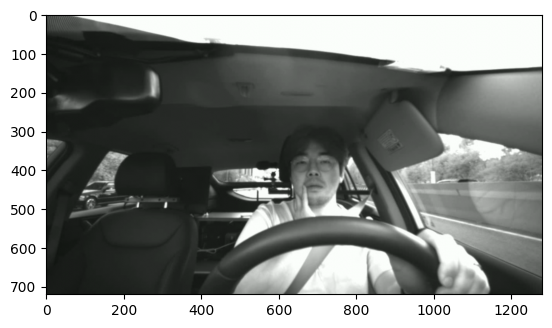

In [41]:
# x_imgs['front'][0][0].shape
import matplotlib.pyplot as plt
plt.imshow((x_imgs['front'][0][0]) / 255.)
plt.show()

In [42]:
x_can[0][0]

array([ 0.115, -0.355,  0.04 ,  0.4  ])

In [43]:
x_bio[0][0]

array([0.9613755])

In [44]:
y[0]

array([0., 0., 0., 1.])

# (Deep learning) Model build

In [79]:
input_setup = {
    'cols_CAN':['LAT_ACCEL', 'LONG_ACCEL','YAW_RATE', 'SAS_Angle',],
    'deltaT_CAN':[-5, 0],      # sec
    'sampling_time_CAN':0.5,    # sec
    
    'cols_BIO':['EDA'],
    'deltaT_BIO':[-5, 0],      # sec
    'sampling_time_BIO':0.5,     # sec
    
    'image_view':['front', 'side'],
    'image_mode':['ir', 'ir'],
    'deltaT_image':[-4, -2],      # sec
    'sampling_time_image':1,    # hz
}

data_loader = DataLoader(drivers=drivers,
                         states=states,
                         batch_size=32,
                         shuffle=True,
                         name='demo_training',
                         kwargs=input_setup,
                         )

In [80]:
x, y = data_loader[2]
x_can, x_bio, x_imgs = x

print(x_can.shape)
print(x_bio.shape)
print(x_imgs['front'].shape)
print(x_imgs['side'].shape)
print(y.shape)

(29, 9, 4)
(29, 9, 1)
(29, 1, 720, 1280, 3)
(29, 1, 720, 1280, 3)
(29, 4)


In [78]:
print(len(data_loader))
        
for x, y in data_loader:
    x_can, x_bio, x_images = x
    print(y.shape)
    

9
(27, 4)
(31, 4)


KeyboardInterrupt: 

In [46]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'